In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"Dataset\drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.shape

(200, 6)

In [4]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
def count(df):
    for col in df.columns:
        if (col!='Age'):
            print(df[col].value_counts())
            print("-" * 40) 
count(df)

Sex
M    104
F     96
Name: count, dtype: int64
----------------------------------------
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
----------------------------------------
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
----------------------------------------
Na_to_K
12.006    2
18.295    2
10.114    1
7.798     1
25.355    1
         ..
34.686    1
11.567    1
9.894     1
14.020    1
11.349    1
Name: count, Length: 198, dtype: int64
----------------------------------------
Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
----------------------------------------


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['BP'] = le.fit_transform(df['BP'])

In [9]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485
std,16.544315,0.500854,0.821752,0.501029,7.223956
min,15.000000,0.000000,0.000000,0.000000,6.269000
25%,31.000000,0.000000,0.000000,0.000000,10.445500
50%,45.000000,1.000000,1.000000,0.000000,13.936500
75%,58.000000,1.000000,2.000000,1.000000,19.380000
max,74.000000,1.000000,2.000000,1.000000,38.247000


<Axes: xlabel='Age', ylabel='Count'>

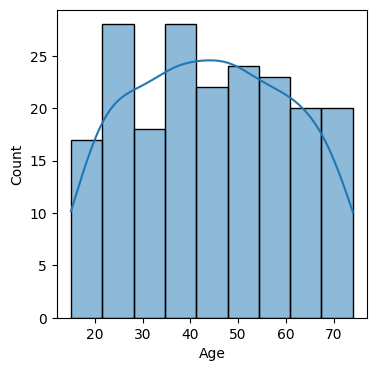

In [10]:
plt.figure(figsize=(4, 4))
sns.histplot(df['Age'], kde=True)  

<Axes: xlabel='Na_to_K', ylabel='Count'>

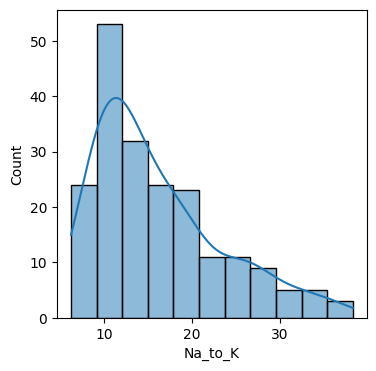

In [11]:
plt.figure(figsize=(4, 4))
sns.histplot(df['Na_to_K'], kde=True)  

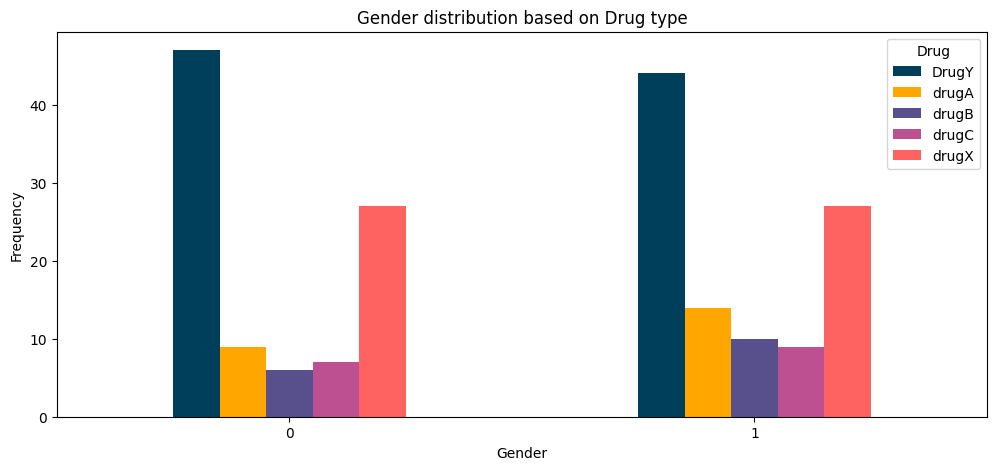

In [12]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

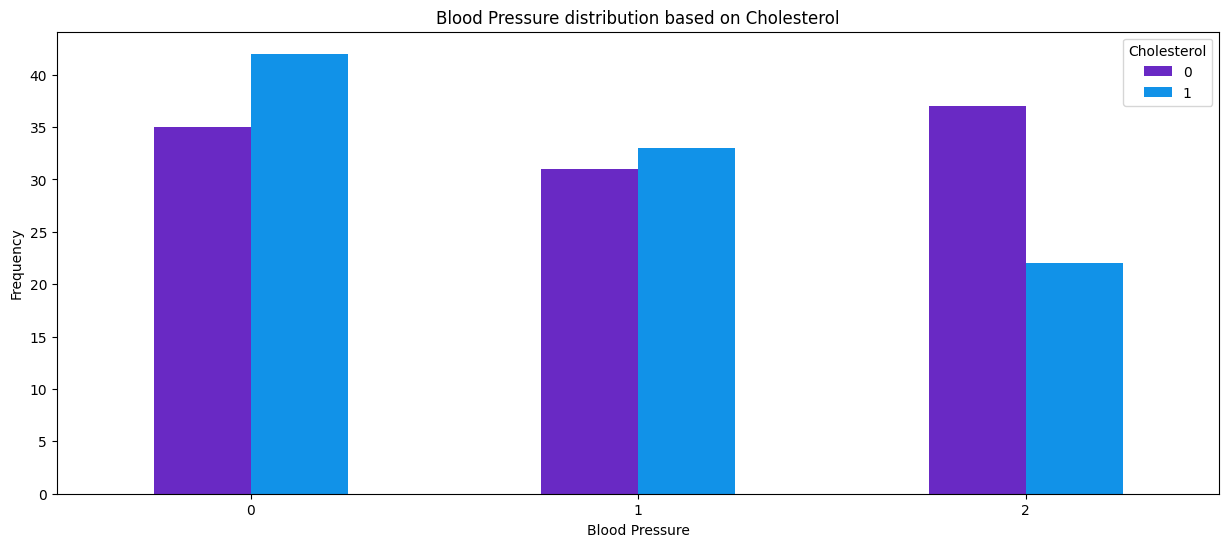

In [13]:
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

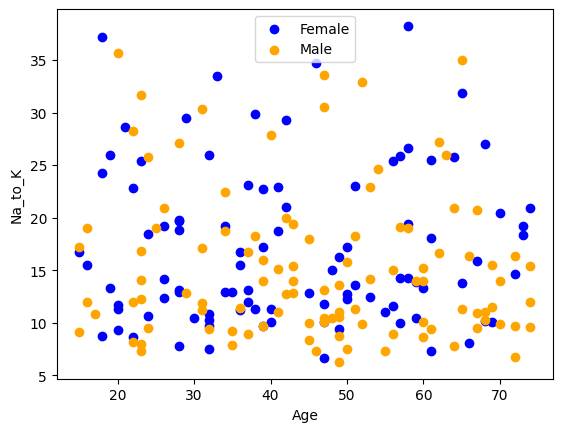

(Text(0.5, 24.0, 'Age'),
 Text(24.000000000000007, 0.5, 'Na_to_K'),
 None)

In [14]:
plt.scatter(df.Age[df.Sex==0], df.Na_to_K[df.Sex==0], c="Blue", label="Female")
plt.scatter(df.Age[df.Sex==1], df.Na_to_K[df.Sex==1], c="Orange", label="Male")
plt.xlabel("Age"), plt.ylabel("Na_to_K"), plt.legend(), plt.show()

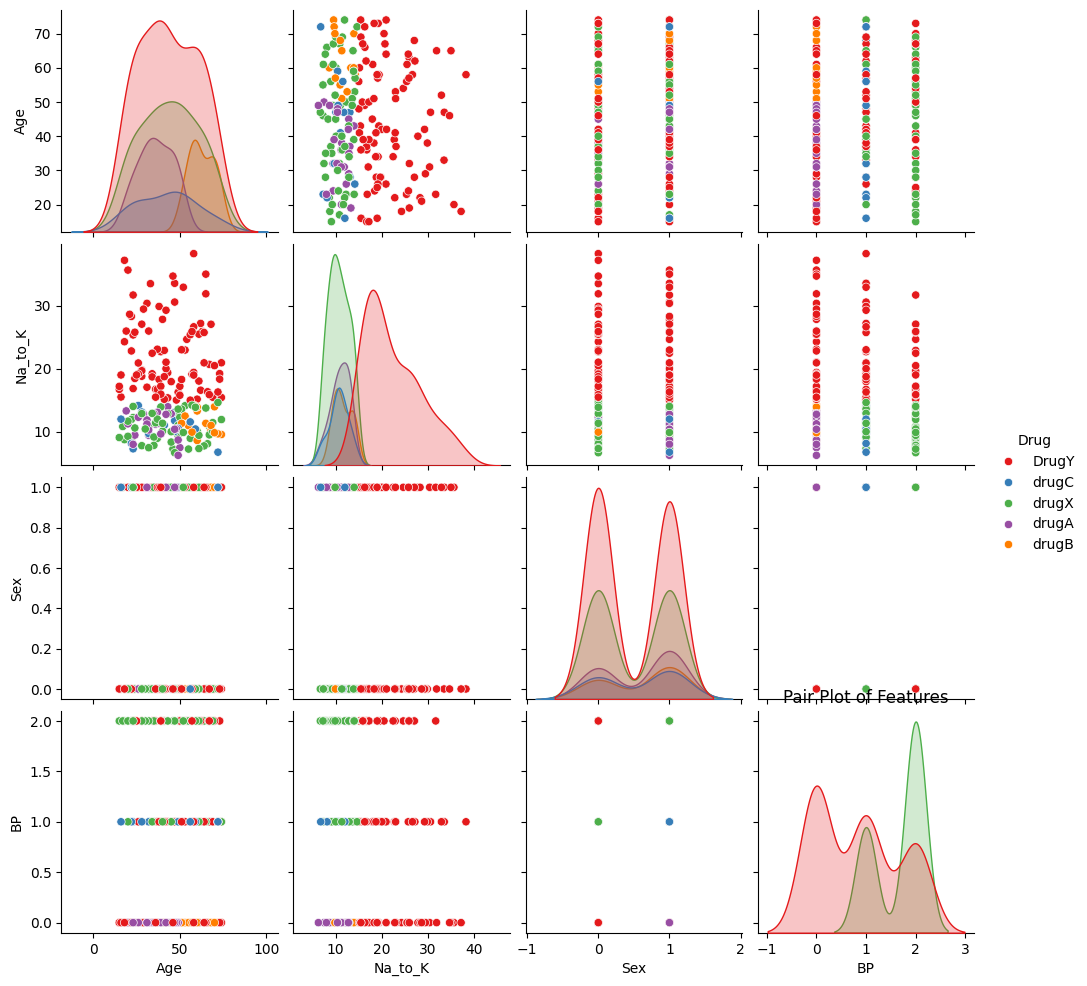

In [15]:
sns.pairplot(df, hue='Drug', vars=['Age', 'Na_to_K', 'Sex', 'BP'], palette='Set1')
plt.title('Pair Plot of Features')
plt.show()

In [16]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

In [17]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK, include_lowest=True)
df.drop(columns=['Na_to_K'], inplace=True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
X = df.drop(columns=['Drug'])  
y = df['Drug']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [20]:
df.head()

,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
0,0,0,0,DrugY,20s,20-30
1,1,1,0,drugC,40s,10-20
2,1,1,0,drugC,40s,10-20
3,0,2,0,drugX,20s,<10
4,0,1,0,DrugY,60s,10-20


In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

log_model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500))
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7833333333333333
Logistic Regression Report:
               precision    recall  f1-score   support

       DrugY       0.77      0.77      0.77        26
       drugA       1.00      0.86      0.92         7
       drugB       0.50      1.00      0.67         3
       drugC       0.00      0.00      0.00         6
       drugX       0.86      1.00      0.92        18

    accuracy                           0.78        60
   macro avg       0.63      0.73      0.66        60
weighted avg       0.73      0.78      0.75        60



In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

       DrugY       0.84      0.81      0.82        26
       drugA       1.00      0.57      0.73         7
       drugB       0.60      1.00      0.75         3
       drugC       0.75      0.50      0.60         6
       drugX       0.77      0.94      0.85        18

    accuracy                           0.80        60
   macro avg       0.79      0.76      0.75        60
weighted avg       0.82      0.80      0.79        60



In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

Best parameters found:  {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

       DrugY       0.77      0.77      0.77        26
       drugA       1.00      0.86      0.92         7
       drugB       0.50      1.00      0.67         3
       drugC       0.67      0.33      0.44         6
       drugX       0.89      0.94      0.92        18

    accuracy                           0.80        60
   macro avg       0.77      0.78      0.74        60
weighted avg       0.81      0.80      0.79        60



In [24]:
# SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', probability=True)  # Enable probability estimates
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7833333333333333
SVM Classification Report:
               precision    recall  f1-score   support

       DrugY       0.76      0.73      0.75        26
       drugA       1.00      0.86      0.92         7
       drugB       0.50      1.00      0.67         3
       drugC       1.00      0.17      0.29         6
       drugX       0.82      1.00      0.90        18

    accuracy                           0.78        60
   macro avg       0.82      0.75      0.70        60
weighted avg       0.82      0.78      0.76        60



In [25]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with k=5 (default)
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)


print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7166666666666667
KNN Classification Report:
               precision    recall  f1-score   support

       DrugY       0.77      0.77      0.77        26
       drugA       0.83      0.71      0.77         7
       drugB       0.43      1.00      0.60         3
       drugC       0.67      0.33      0.44         6
       drugX       0.72      0.72      0.72        18

    accuracy                           0.72        60
   macro avg       0.68      0.71      0.66        60
weighted avg       0.74      0.72      0.71        60



In [26]:
# Tuning KNN
k_values = list(range(1, 30))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# best k
best_k = k_values[np.argmax(accuracies)]
print(f"🔍 Best k value: {best_k}")


best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best_knn = best_knn.predict(X_test)

print("Optimized KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_best_knn))

🔍 Best k value: 19
Optimized KNN Accuracy: 0.8166666666666667
KNN Classification Report:
               precision    recall  f1-score   support

       DrugY       0.81      0.81      0.81        26
       drugA       1.00      0.86      0.92         7
       drugB       0.60      1.00      0.75         3
       drugC       0.50      0.17      0.25         6
       drugX       0.86      1.00      0.92        18

    accuracy                           0.82        60
   macro avg       0.75      0.77      0.73        60
weighted avg       0.80      0.82      0.80        60



In [27]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred_dt = DTclassifier.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7666666666666667
Decision Tree Classification Report:
               precision    recall  f1-score   support

       DrugY       0.75      0.69      0.72        26
       drugA       1.00      0.86      0.92         7
       drugB       0.50      1.00      0.67         3
       drugC       0.57      0.67      0.62         6
       drugX       0.88      0.83      0.86        18

    accuracy                           0.77        60
   macro avg       0.74      0.81      0.76        60
weighted avg       0.79      0.77      0.77        60



In [28]:
# Naive Bayers
from sklearn.naive_bayes import CategoricalNB

NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)
y_pred_nb = NBclassifier1.predict(X_test)

print("Naive Bayers Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayers Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayers Accuracy: 0.8
Naive Bayers Classification Report:
               precision    recall  f1-score   support

       DrugY       0.83      0.73      0.78        26
       drugA       1.00      0.86      0.92         7
       drugB       0.50      1.00      0.67         3
       drugC       0.67      0.33      0.44         6
       drugX       0.82      1.00      0.90        18

    accuracy                           0.80        60
   macro avg       0.76      0.78      0.74        60
weighted avg       0.81      0.80      0.79        60



In [29]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM', 'Categorical NB', 'Decision Tree', 'Random Forest', ], 
                        'Accuracy': [accuracy_score(y_test, y_pred_log)*100, accuracy_score(y_test, y_pred_knn)*100, accuracy_score(y_test, y_pred_best_knn)*100, accuracy_score(y_test, y_pred_svm)*100, accuracy_score(y_test, y_pred_nb)*100, accuracy_score(y_test, y_pred_dt)*100, accuracy_score(y_test, y_pred_rf)*100]})
compare


,Model,Accuracy
0,Logistic Regression,78.333333
1,K Neighbors,71.666667
2,K Neighbors Max,81.666667
3,SVM,78.333333
4,Categorical NB,80.000000
5,Decision Tree,76.666667
6,Random Forest,80.000000


In [30]:
y_scores_log = log_model.predict_proba(X_test)[:, 1]
y_scores_knn = knn.predict_proba(X_test)[:, 1]
y_scores_svm = svm_model.predict_proba(X_test)[:, 1]
y_scores_rf = clf.predict_proba(X_test)[:, 1]
y_scores_nb = NBclassifier1.predict_proba(X_test)[:, 1]
y_scores_dt = DTclassifier.predict_proba(X_test)[:, 1]


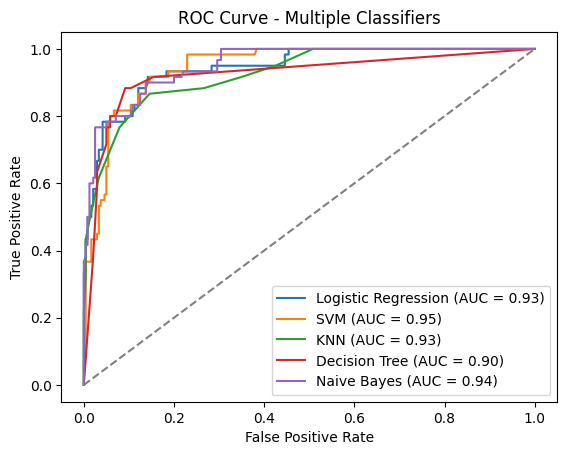

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

def plot_roc_curve(fpr, tpr, auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

y_scores_log = log_model.predict_proba(X_test)
fpr_log, tpr_log, _ = roc_curve(y_test_bin.ravel(), y_scores_log.ravel())
auc_log = roc_auc_score(y_test_bin, y_scores_log, average='macro', multi_class='ovr')
plot_roc_curve(fpr_log, tpr_log, auc_log, 'Logistic Regression')

y_scores_svm = svm_model.predict_proba(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin.ravel(), y_scores_svm.ravel())
auc_svm = roc_auc_score(y_test_bin, y_scores_svm, average='macro', multi_class='ovr')
plot_roc_curve(fpr_svm, tpr_svm, auc_svm, 'SVM')

y_scores_knn = best_knn.predict_proba(X_test)
fpr_knn, tpr_knn, _ = roc_curve(y_test_bin.ravel(), y_scores_knn.ravel())
auc_knn = roc_auc_score(y_test_bin, y_scores_knn, average='macro', multi_class='ovr')
plot_roc_curve(fpr_knn, tpr_knn, auc_knn, 'KNN')

y_scores_dt = DTclassifier.predict_proba(X_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin.ravel(), y_scores_dt.ravel())
auc_dt = roc_auc_score(y_test_bin, y_scores_dt, average='macro', multi_class='ovr')
plot_roc_curve(fpr_dt, tpr_dt, auc_dt, 'Decision Tree')

y_scores_nb = NBclassifier1.predict_proba(X_test)
fpr_nb, tpr_nb, _ = roc_curve(y_test_bin.ravel(), y_scores_nb.ravel())
auc_nb = roc_auc_score(y_test_bin, y_scores_nb, average='macro', multi_class='ovr')
plot_roc_curve(fpr_nb, tpr_nb, auc_nb, 'Naive Bayes')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiple Classifiers')
plt.legend(loc='lower right')
plt.show()


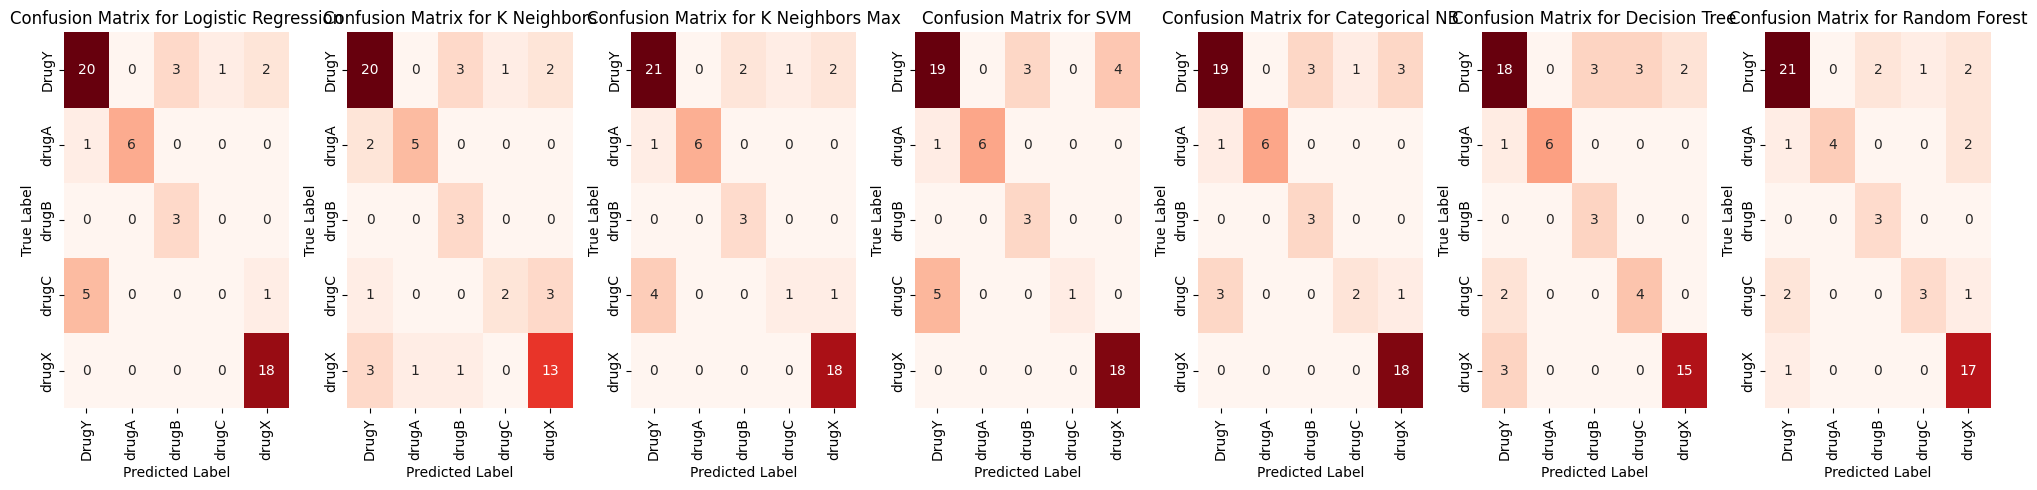

In [32]:
from sklearn.metrics import confusion_matrix
predictions = {
    'Logistic Regression': y_pred_log,
    'K Neighbors': y_pred_knn,
    'K Neighbors Max': y_pred_best_knn,
    'SVM': y_pred_svm,
    'Categorical NB': y_pred_nb,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
}

# Create subplots for confusion matrices
n_models = len(predictions)
fig, axes = plt.subplots(1, n_models, figsize=(20, 5))

for ax, (model_name, y_pred) in zip(axes, predictions.items()):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', cbar=False,
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), ax=ax)
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

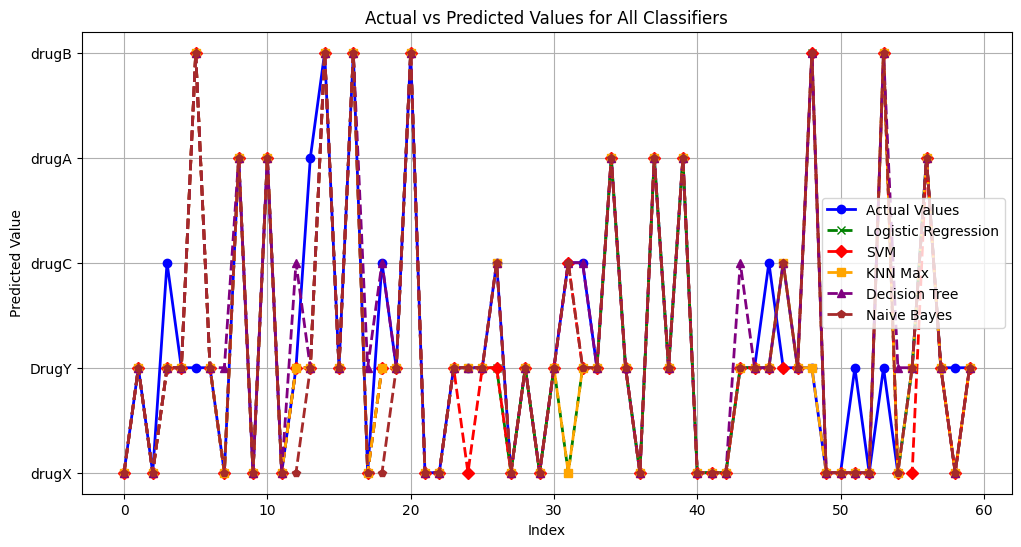

In [33]:
actual_values = y_test.reset_index(drop=True) 

predicted_log = log_model.predict(X_test)
predicted_svm = svm_model.predict(X_test)
predicted_knn = best_knn.predict(X_test)
predicted_dt = DTclassifier.predict(X_test)
predicted_nb = NBclassifier1.predict(X_test)

predicted_log = pd.Series(predicted_log).reset_index(drop=True)
predicted_svm = pd.Series(predicted_svm).reset_index(drop=True)
predicted_knn = pd.Series(predicted_knn).reset_index(drop=True)
predicted_dt = pd.Series(predicted_dt).reset_index(drop=True)
predicted_nb = pd.Series(predicted_nb).reset_index(drop=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_values, label='Actual Values', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)

# Each model with distinct colors & dashed lines for better contrast
plt.plot(predicted_log, label='Logistic Regression', marker='x', color='green', linestyle='--', linewidth=2)
plt.plot(predicted_svm, label='SVM', marker='D', color='red', linestyle='--', linewidth=2)
plt.plot(predicted_knn, label='KNN Max', marker='s', color='orange', linestyle='--', linewidth=2)
plt.plot(predicted_dt, label='Decision Tree', marker='^', color='purple', linestyle='--', linewidth=2)
plt.plot(predicted_nb, label='Naive Bayes', marker='p', color='brown', linestyle='--', linewidth=2)

plt.title('Actual vs Predicted Values for All Classifiers')
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
from sklearn.ensemble import VotingClassifier

models = [
    ("Logistic Regression", log_model),
    ("Random Forest", clf),
    ("SVM", svm_model),
    ("KNN", knn_model),
    ("Decision Tree", DTclassifier),
    ("Naive Bayes", NBclassifier1)
]

voting_clf = VotingClassifier(estimators=models, voting="soft")
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

voting_accuracy = accuracy_score(y_test, y_pred_voting)
voting_report = classification_report(y_test, y_pred_voting)
voting_accuracy, voting_report

print(f"Voting Classifier Accuracy: {voting_accuracy:.2%}")
print("Classification Report:")
print(voting_report)



Voting Classifier Accuracy: 83.33%
Classification Report:
              precision    recall  f1-score   support

       DrugY       0.83      0.77      0.80        26
       drugA       1.00      0.86      0.92         7
       drugB       0.50      1.00      0.67         3
       drugC       0.75      0.50      0.60         6
       drugX       0.90      1.00      0.95        18

    accuracy                           0.83        60
   macro avg       0.80      0.83      0.79        60
weighted avg       0.85      0.83      0.83        60



In [50]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_models = [
    ("Logistic Regression", log_model),
    ("Random Forest", clf),
    ("SVM", svm_model),
    ("KNN", knn_model),
    ("Decision Tree", DTclassifier),
    ("Naive Bayes", NBclassifier1)
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True)
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)

stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
stacking_report = classification_report(y_test, y_pred_stacking)

print(f"Stacking Classifier Accuracy: {stacking_accuracy:.2%}")
print("📊 Classification Report:")
print(stacking_report)

Stacking Classifier Accuracy: 81.67%
📊 Classification Report:
              precision    recall  f1-score   support

       DrugY       0.80      0.77      0.78        26
       drugA       1.00      0.86      0.92         7
       drugB       0.50      1.00      0.67         3
       drugC       0.67      0.33      0.44         6
       drugX       0.90      1.00      0.95        18

    accuracy                           0.82        60
   macro avg       0.77      0.79      0.75        60
weighted avg       0.82      0.82      0.81        60



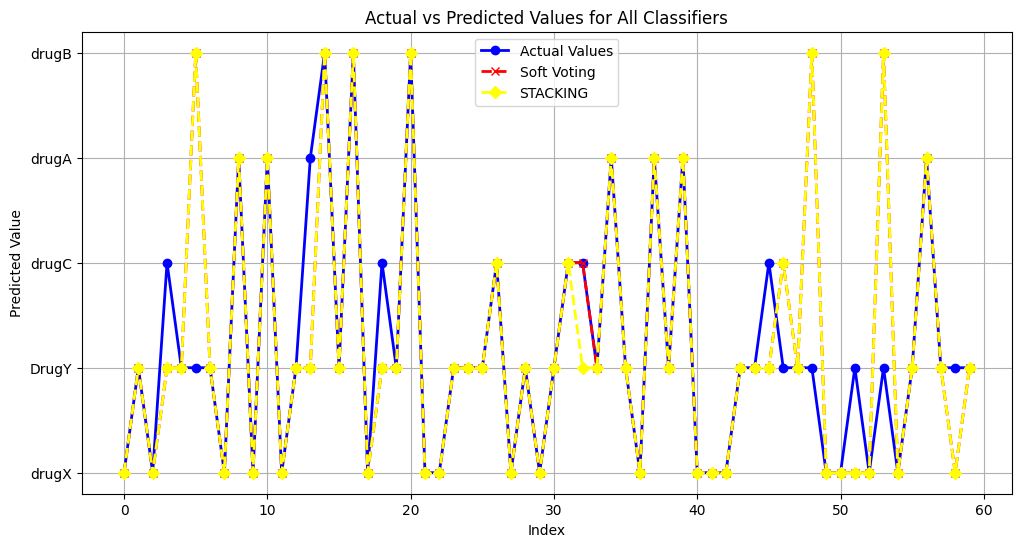

In [56]:
actual_values = y_test.reset_index(drop=True) 

predicted_vote = voting_clf.predict(X_test)
predicted_stack = stacking_clf.predict(X_test)

predicted_vote = pd.Series(predicted_vote).reset_index(drop=True)
predicted_stack = pd.Series(predicted_stack).reset_index(drop=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_values, label='Actual Values', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)

# Each model with distinct colors & dashed lines for better contrast
plt.plot(predicted_vote, label='Soft Voting', marker='x', color='red', linestyle='--', linewidth=2)
plt.plot(predicted_stack, label='STACKING', marker='D', color='yellow', linestyle='--', linewidth=2)

plt.title('Actual vs Predicted Values for All Classifiers')
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()